In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [22]:
def partial_derivative(g, Y, i, epsilon = 1e-6):
    # del g/del yi
    g1 = g(Y)
    Y[i] += epsilon
    g2 = g(Y)
    return (g2 - g1) / epsilon

def trapezoidal_rule(Y, x_n, Y_n, h):
    return Y_n + h / 2 * (f(x_n + h, Y) + f(x_n, Y_n)) - Y

def newton_raphson(Y_n, x_n, h, iterations = 10000, tolerance = 1e-6):
    Y_k = Y_n + h*f(x_n, Y_n)
    J_k = np.zeros((N, N))
    # J_k
    # J_k[i, j] = del Fi / del yj
    error = 1
    # print("starting Newton Rapson")
    while iterations and error > tolerance:
        for i in range(N):
            for j in range(N):
                def Fi(Y_):
                    return trapezoidal_rule(Y_, x_n, Y_n, h)[i]
                J_k[i, j] = partial_derivative(Fi, Y_k, j)
        # print(" J = \n",J_k)
        # print(" y* => ",Y_k)
        Y_k = Y_k - np.linalg.inv(J_k) @ trapezoidal_rule(Y_k, x_n, Y_n, h)
        iterations -= 1
        error = np.linalg.norm(trapezoidal_rule(Y_k, x_n, Y_n, h))
    return Y_k

In [23]:
def equation_solver(x0, x1, num_points, Y0, N):
    h = (x1 - x0) / num_points
    Y_n = Y0
    x_n = x0
    '''
    Y_(n + 1) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n))
    '''
    output = np.zeros((N, num_points + 1))
    for i in range(N):
        output[i][0] = Y_n[i]
    
    # print(Y_n)
    for n in range(1, num_points + 1):
        '''
        Y_(n + 1) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n))
        Now we have to solve Y_(n + 1) [vector of size Nx1]
        Newton-Rapson
        F(Y_(n + 1)) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n)) - Y_(n + 1) 
        Find Y_(n + 1) = [y1, y2, ..., yN] s.t
        F(Y_(n + 1)) = 0
        '''
        # print("Y = ",Y_n)
        Y_n = newton_raphson(Y_n, x_n, h)
        x_n += h
        for i in range(N):
            output[i][n] = Y_n[i]

    return output


In [24]:
'''
Functions 
'''
def function_1(x, Y):
    return  -2 * Y[0] + Y[1] - 2 * Y[2]

def function_2(x, Y):
    return Y[0] - 2 * Y[1] + 2 * Y[2]

def function_3(x, Y):
    return 3 * Y[0] - 3 * Y[1] + 5 * Y[2]

def f(x, Y):
    return np.array([function_1(x, Y), function_2(x, Y), function_3(x, Y)])

N = 3  # Number of Functions

x0, x1 = 0, 1
Y0 = np.array([-2, 2, 4])

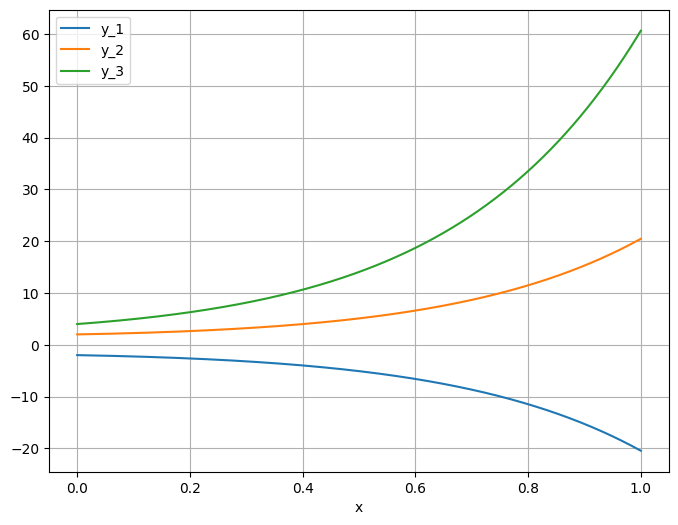

In [25]:
num_points = 1000
x_array = np.linspace(x0, x1, num_points + 1)
y_array = equation_solver(x0, x1, num_points, Y0, N)
plt.figure(figsize=(8, 6))
for i in range(N):
    plt.plot(x_array, y_array[i], label=f'y_{i + 1}')
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.show()

WEEK 5  
a y'' + b y' + c y = g(t)

consider the below substitution  
y1 = y  
y2 = y'    

a y2' + b y2 + c y1 = g(t)

Now the system of equations are   
y1' = y2  
y2' = -b/a y2 - c/a y1 + g(t)/a    

In [26]:
a = 1
b = 1
c = 1

$g(t) = A sin(2 \pi f t + \phi ) $  

In [27]:

def g(x, A = 1, f_ = 1, c_ = np.pi):
    # A sin(2*pi*f_ + c_)
    return A * np.sin(2*np.pi*f_*x + c_)

def function_1(x, Y):
    return  Y[1]
def function_2(x, Y):
    return -b/a * Y[1] - c/a * Y[0] + g(x)/a

def f(x, Y):
    return np.array([function_1(x, Y), function_2(x, Y)])

N = 2  # Number of Functions

x0, x1 = 0, 40
Y0 = np.array([0, 0])

In [28]:
num_points = 10000
t_array = np.linspace(x0, x1, num_points + 1)

alpha =  0.025313631977177762
beta =  0.004133492238317597
c1 =  -0.18604187120314183
c2 =  -0.004133492238317597


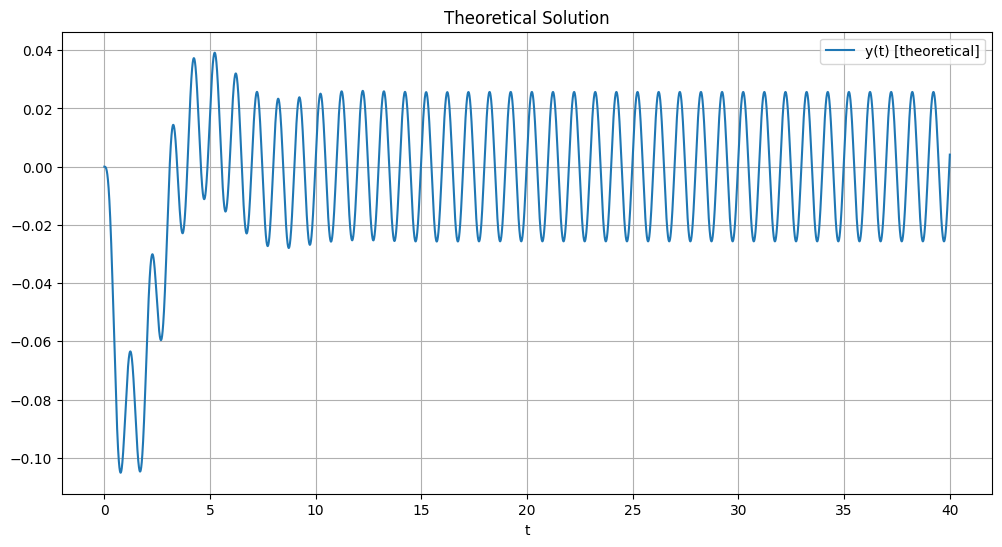

In [29]:
# Theoretical solution
# y(t) = alpha * sin(2*pi*t) + beta * cos(2*pi*t) + e^(-t/2)(c1*sin(sqrt(3)/2*t) + c2 cos(sqrt(3)/2*t))
alpha = (4*np.pi**2 - 1)/(4*np.pi**2 + (1-4*np.pi**2)**2)
beta = (2*np.pi)/(4*np.pi**2 + (1-4*np.pi**2)**2)
c2 = - beta
c1 = - (4 * np.pi / np.sqrt(3)) * alpha - beta / np.sqrt(3)
print("alpha = ",alpha)
print("beta = ",beta)
print("c1 = ",c1)
print("c2 = ",c2)

y_th = alpha * np.sin(2*np.pi*t_array) + beta * np.cos(2*np.pi*t_array) + np.exp(-t_array/2)*(c1*np.sin(np.sqrt(3)/2*t_array) + c2 * np.cos(np.sqrt(3)/2*t_array))

plt.figure(figsize=(12, 6))
plt.title("Theoretical Solution")
plt.plot(t_array, y_th, label='y(t) [theoretical]')
plt.xlabel('t')
plt.legend()
plt.grid(True)
plt.show()

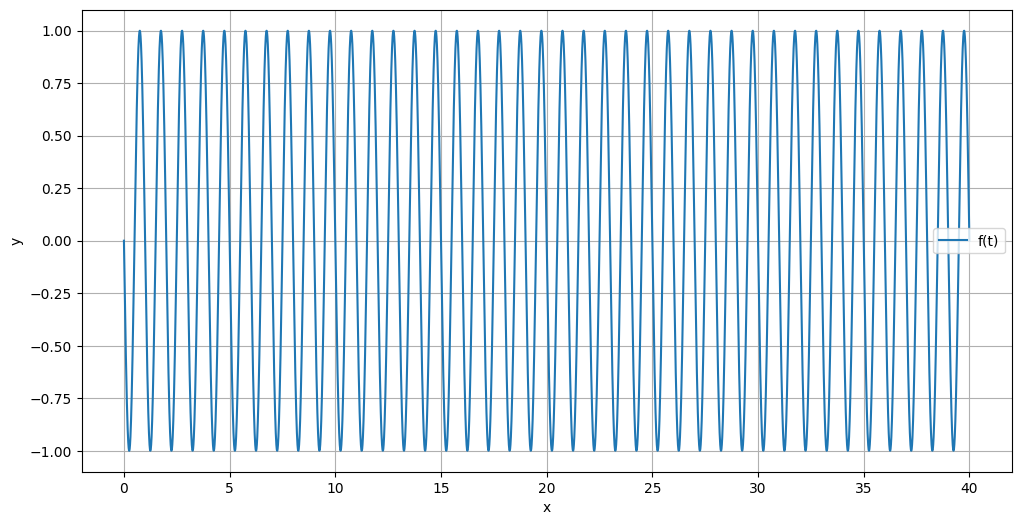

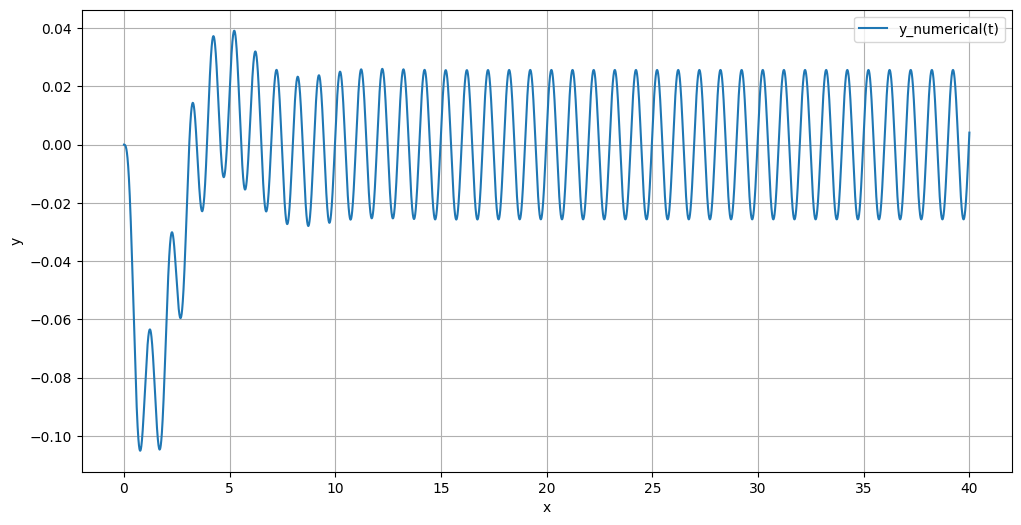

In [30]:
y_array = equation_solver(x0, x1, num_points, Y0, N)

plt.figure(figsize=(12, 6))
plt.plot(t_array, list(map(g,t_array)), label=f'f(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t_array, y_array[0], label=f'y_numerical(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

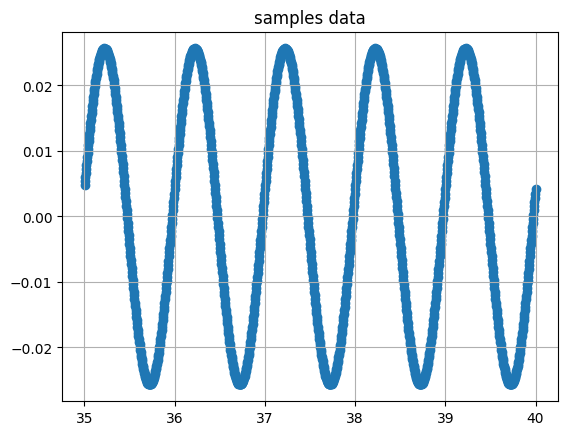

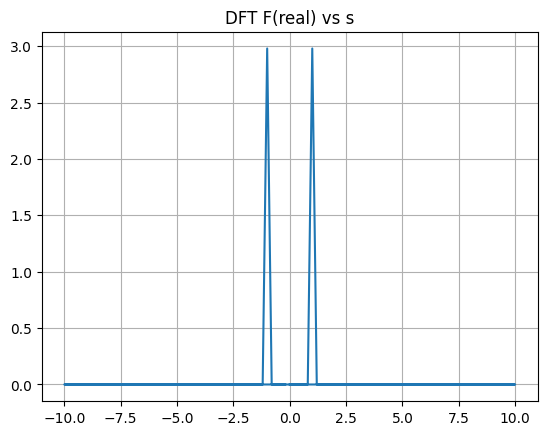

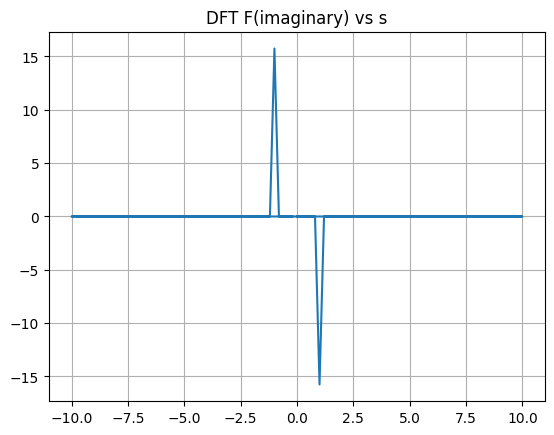

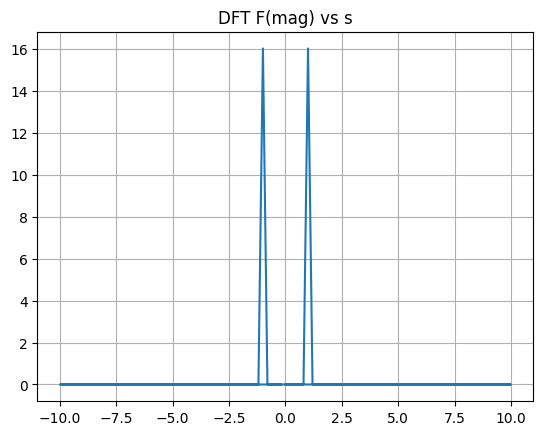

From DFT
Amplitude =  0.025646160006218652
Frequency =  0.9999999999987779


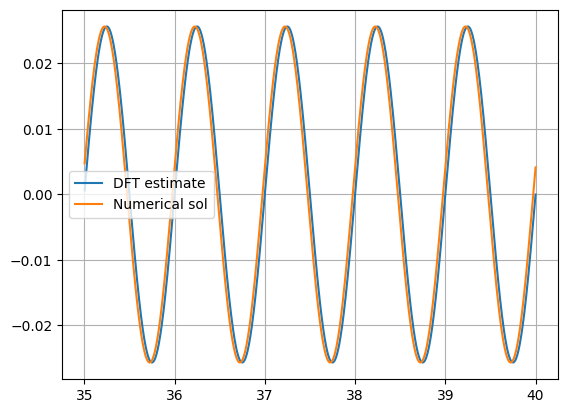

In [31]:
# DFT to check results
# Amp * sin(2*pi*f*t + phi)
def find_Af(signal, t):
    # Compute the DFT
    dft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), d=t[1] - t[0])  # Frequency bins

    ind = []
    for x in range(freqs.size):
        if(abs(freqs[x]) < 10):
            ind.append(x)
    
    plt.title("DFT F(real) vs s")
    plt.plot(freqs[ind], np.real(dft_result[ind]))
    plt.grid()
    plt.show()
    
    plt.title("DFT F(imaginary) vs s")
    plt.plot(freqs[ind], np.imag(dft_result[ind]))
    plt.grid()
    plt.show()

    plt.title("DFT F(mag) vs s")
    plt.plot(freqs[ind], np.abs(dft_result[ind]))
    plt.grid()
    plt.show()

    # Finding the peak frequency
    peak_index = np.argmax(np.abs(dft_result))
    peak_freq = freqs[peak_index]

    # Finding amplitude from the magnitude at the peak frequency
    amplitude = 2 * np.abs(dft_result[peak_index]) / len(signal)

    return amplitude, abs(peak_freq)

pts = 1250
t = t_array[-pts:]
signal = y_array[0][-pts:]
plt.scatter(t,signal)
plt.title("samples data")
plt.grid()
plt.show()

Amp,f_ = find_Af(signal,t)
print("From DFT")
print("Amplitude = ",Amp)
print("Frequency = ",f_)
plt.plot(t, Amp * np.sin(2*np.pi*f_*t), label = "DFT estimate")
plt.plot(t, signal, label = "Numerical sol")
plt.legend()
plt.grid()
plt.show()

Amp_theoretical =  0.025648893191719372
f_theoretical =  1


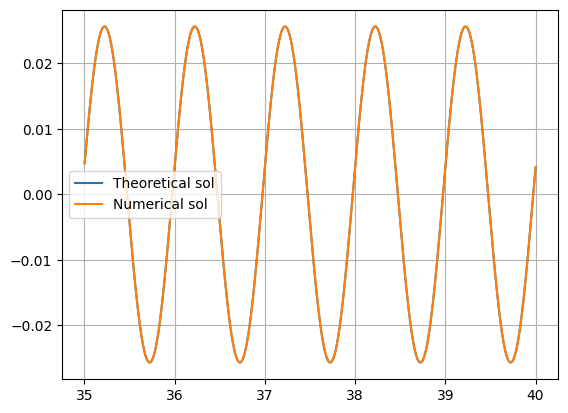

In [32]:
print("Amp_theoretical = ",np.sqrt(alpha**2 + beta**2))
print("f_theoretical = ",1)
plt.plot(t,y_th[-pts:], label = "Theoretical sol")
plt.plot(t, signal, label = "Numerical sol")
plt.legend()
plt.grid()
plt.show()

$g(t) = c'$  

In [33]:
def g(x, c_ = 10):
    return c_

Theoretical solution  
$y_{p}(x) = c'/c = 10/1 = 10$

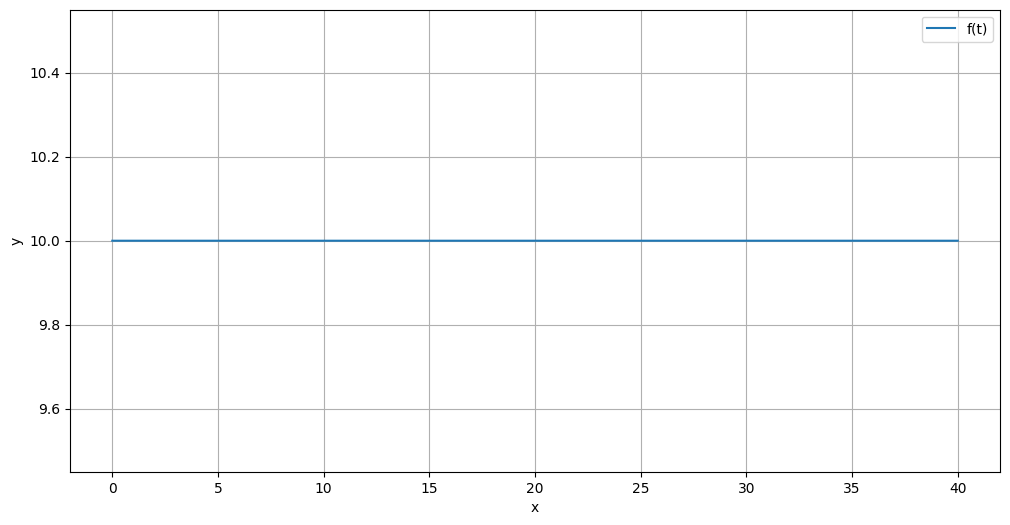

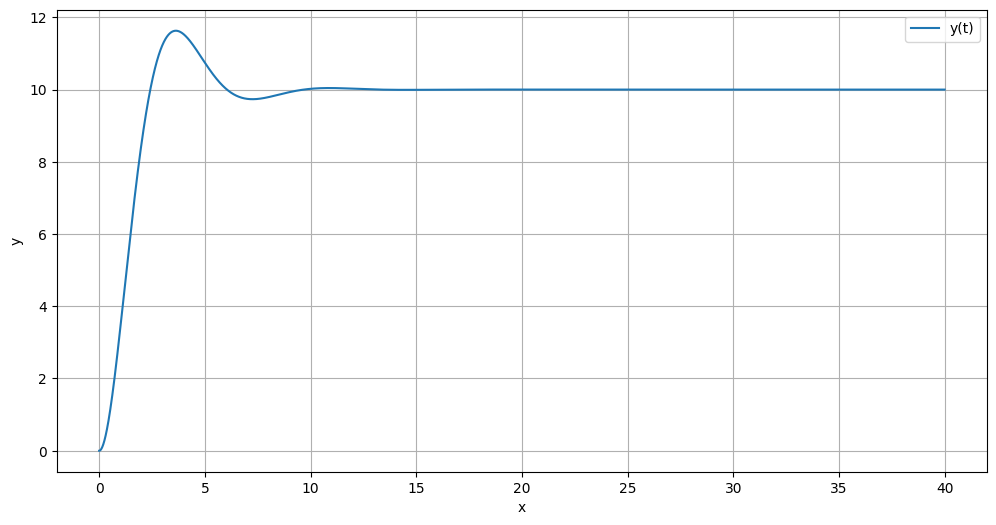

In [34]:
y_array = equation_solver(x0, x1, num_points, Y0, N)

plt.figure(figsize=(12, 6))
plt.plot(t_array, list(map(g,t_array)), label=f'f(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t_array, y_array[0], label=f'y(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Now we have to solve for  
g(t) = square wave  
i.e   
$1$ for  $0 < t < p$    
$0$ for  $p < t < 1$  

period of g(t) = 1

In [35]:
def g(x, t1 = 0.3):
    x = x - np.floor(x)
    if(x < t1):
        return 1
    return 0

Theoretical

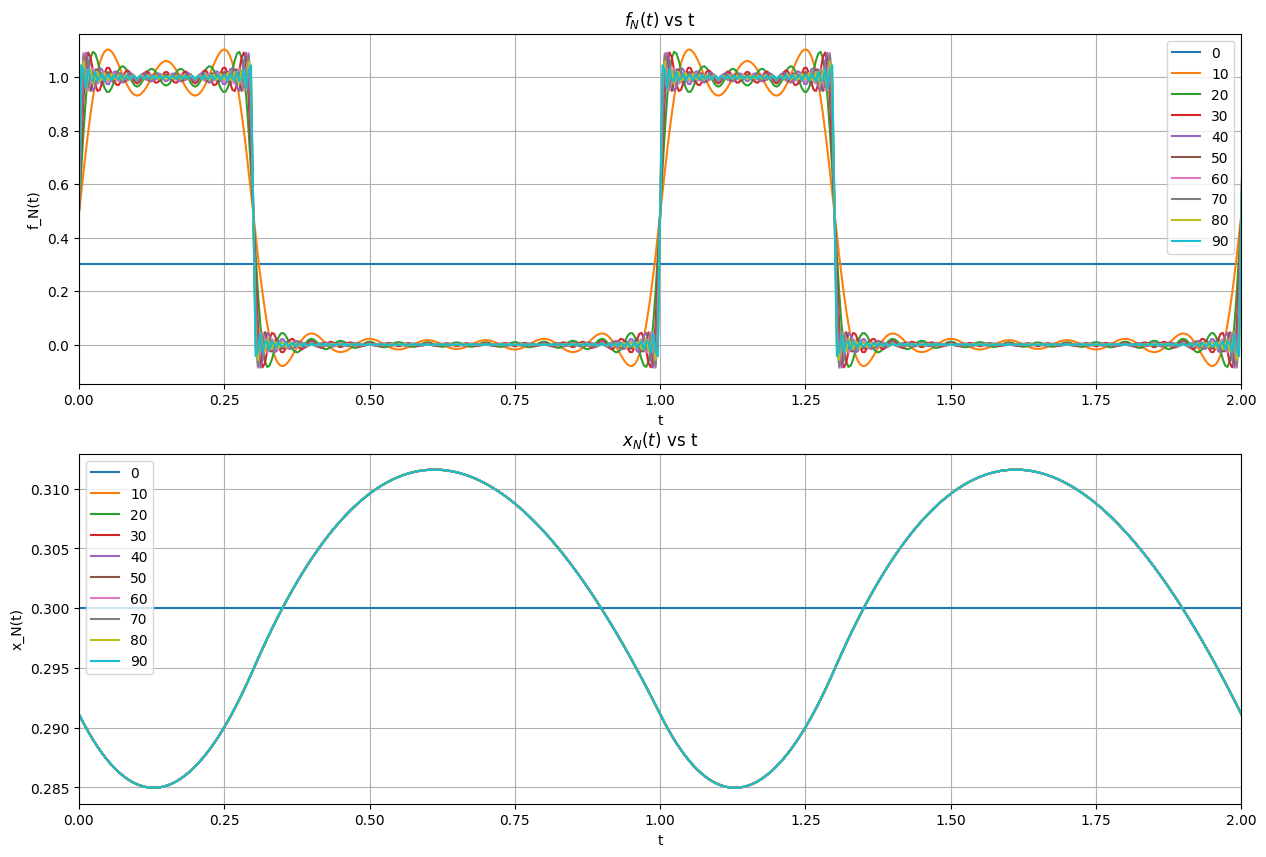

In [36]:
p = 0.3
x0, x1 = 0, 40
t_array = np.linspace(x0, x1, num_points + 1)
# Let us estimate f(t) by its fourier series upto N terms
def A(n):
    return (1/(n*np.pi)) * np.sin(2*np.pi*n*p)
def B(n):
    return (2/(n*np.pi)) * np.sin(np.pi * n * p)**2
def alpha(n):
    Deno = (c - a * (2*np.pi*n)**2)**2 + (b*(2*np.pi*n))**2
    Num = B(n) * (c - a * (2*np.pi*n)**2) + A(n) * b * 2*np.pi*n
    return Num/Deno
def beta(n):
    Deno = (c - a * (2*np.pi*n)**2)**2 + (b*(2*np.pi*n))**2
    Num =  A(n) * (c - a * (2*np.pi*n)**2) - B(n) * b * 2*np.pi*n 
    return Num/Deno

fig,ax = plt.subplots(2,figsize=(15, 10))
ax[0].set_xlabel("t")
ax[0].set_ylabel("f_N(t)")

ax[1].set_xlabel("t")
ax[1].set_ylabel("x_N(t)")

for _ in range(0,100,10):
    fN = np.full(t_array.shape,p)
    for n in range(1,_+1):
        fN = fN + A(n) * np.cos(2*np.pi*n*t_array) + B(n) * np.sin(2*np.pi*n*t_array)

    ax[0].plot(t_array,fN, label = f'{_}')

    xNp = np.full(t_array.shape,p/c) # particular solution
    for n in range(1,_+1):
        xNp = xNp + alpha(n) * np.sin(2*np.pi*n*t_array) + beta(n) * np.cos(2*np.pi*n*t_array)

    ax[1].plot(t_array,xNp, label = f'{_}')

ax[0].grid()
ax[0].legend()
ax[0].set_title("$f_N(t)$ vs t")
ax[0].set_xlim([0,2])

ax[1].grid()
ax[1].legend()
ax[1].set_title("$x_N(t)$ vs t")
ax[1].set_xlim([0,2])

plt.show()

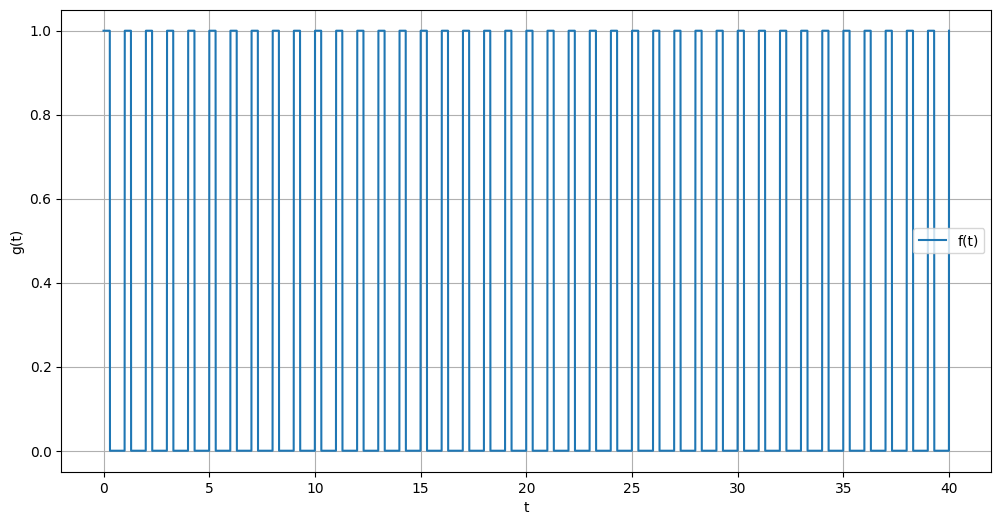

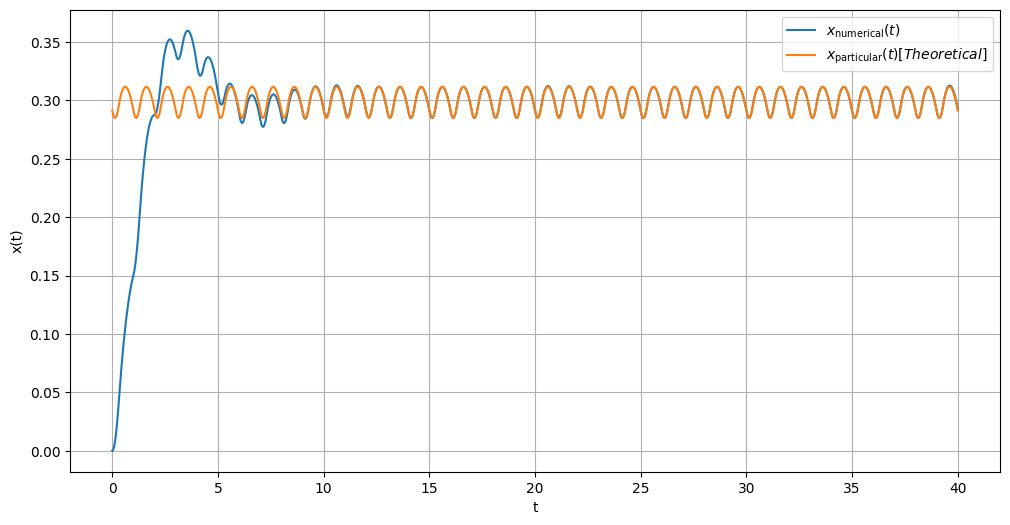

In [37]:
y_array = equation_solver(x0, x1, num_points, Y0, N)

plt.figure(figsize=(12, 6))
plt.plot(t_array, list(map(g,t_array)), label=f'f(t)')
plt.xlabel('t')
plt.ylabel('g(t)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t_array, y_array[0], label='$x_{\mathrm{numerical}}(t)$')
plt.plot(t_array, xNp, label='$x_{\mathrm{particular}}(t) [Theoretical]$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

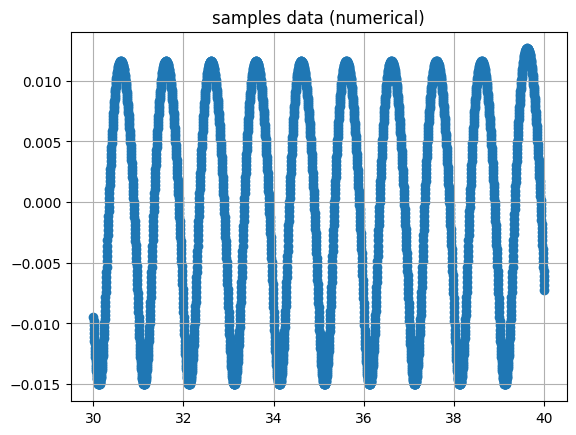

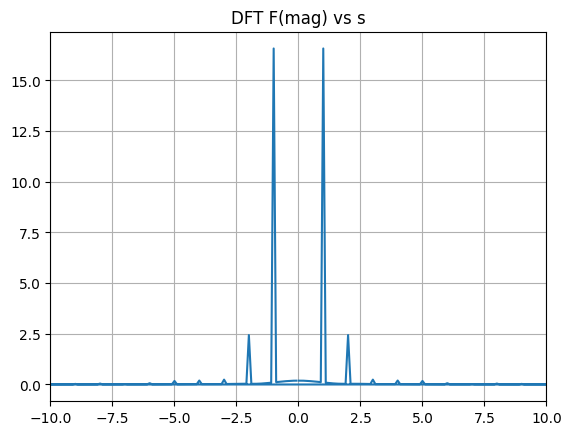

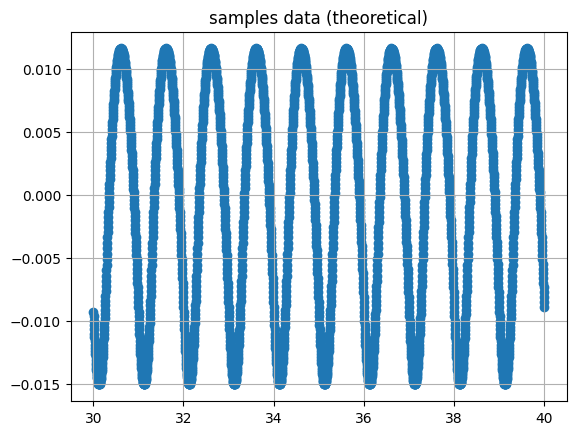

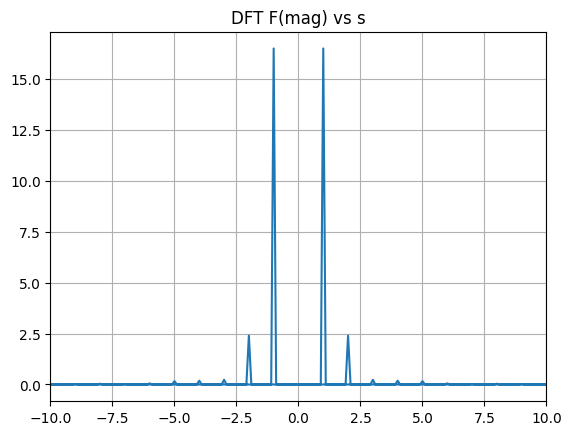

In [38]:
# Find the DFT of numerical solution
# and compare with DFt of theoretical solution

T = 10
pts = np.ceil(T * num_points / (x1 - x0)).astype(int)

t = t_array[-pts:]

# plot the DFT of the numerical solution
signal = y_array[0][-pts:] - p
# plot the sampled signal
plt.scatter(t,signal)
plt.title("samples data (numerical)")
plt.grid()
plt.show()
# Apply the DFT
dft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), d=t[1] - t[0])
plt.title("DFT F(mag) vs s")
plt.plot(freqs, np.abs(dft_result))
plt.xlim([-10,10])
plt.grid()
plt.show()

# plot the DFT of the theoretical solution
signal = xNp[-pts:] - p
# plot the sampled signal
plt.scatter(t,signal)
plt.title("samples data (theoretical)")
plt.grid()
plt.show()

# Apply the DFT
dft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), d=t[1] - t[0])
plt.title("DFT F(mag) vs s")
plt.plot(freqs, np.abs(dft_result))
plt.xlim([-10,10])
plt.grid()
plt.show()

Solving the below LRC circuit  
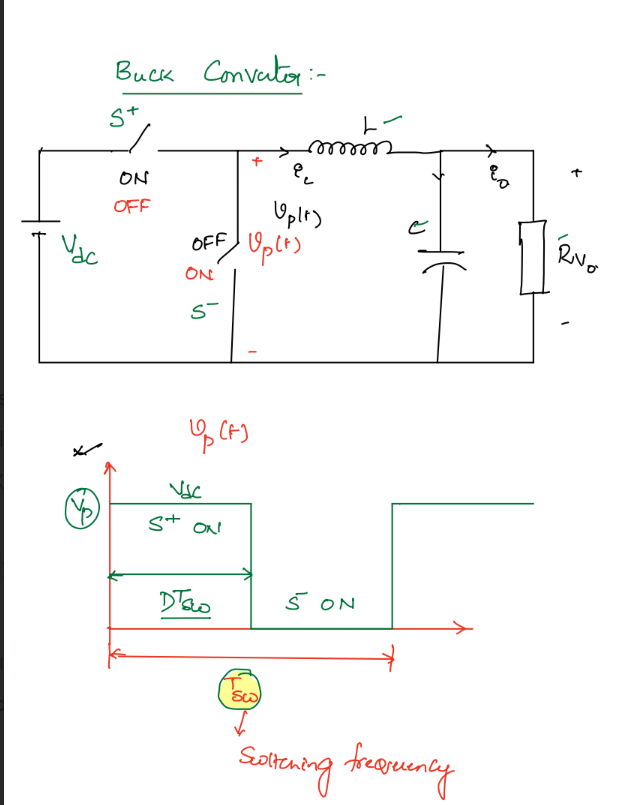  
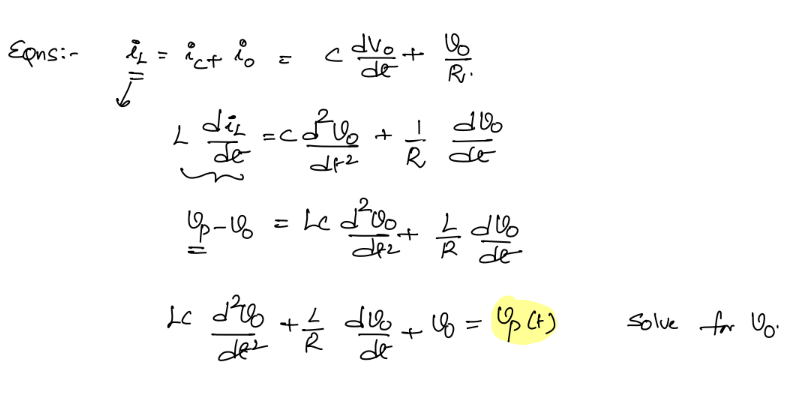  

Tsw = 0.00025, D = 0.7000000000000001, L = 7.999999999999999e-05 H, R = 3.1 Ohm, C = 4.9999999999999996e-05 F


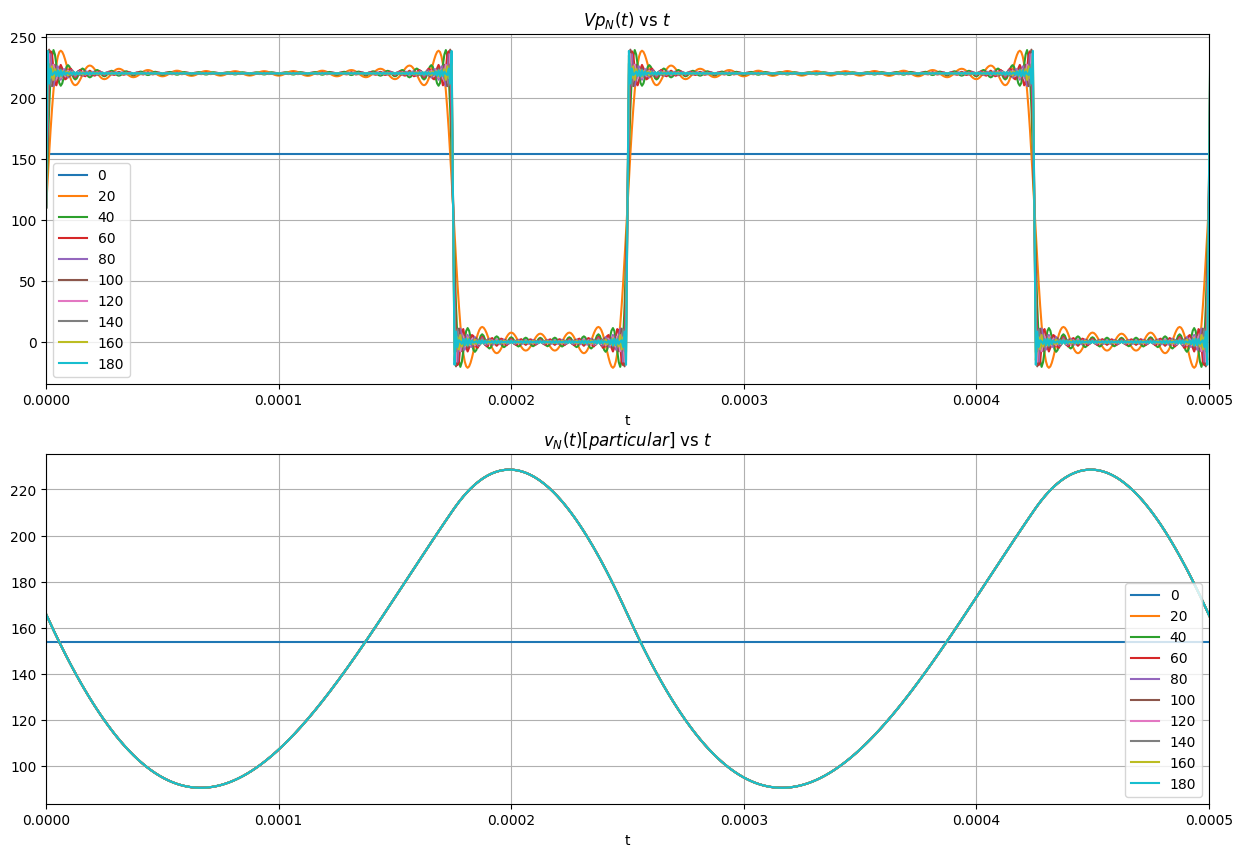

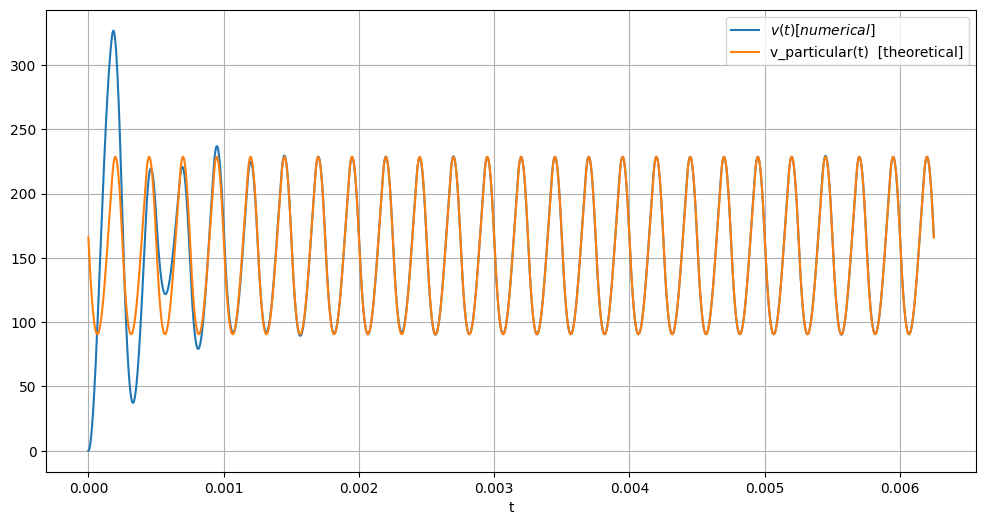

Tsw = 0.0003333333333333333, D = 0.2, L = 7e-05 H, R = 1.6 Ohm, C = 7.999999999999999e-05 F


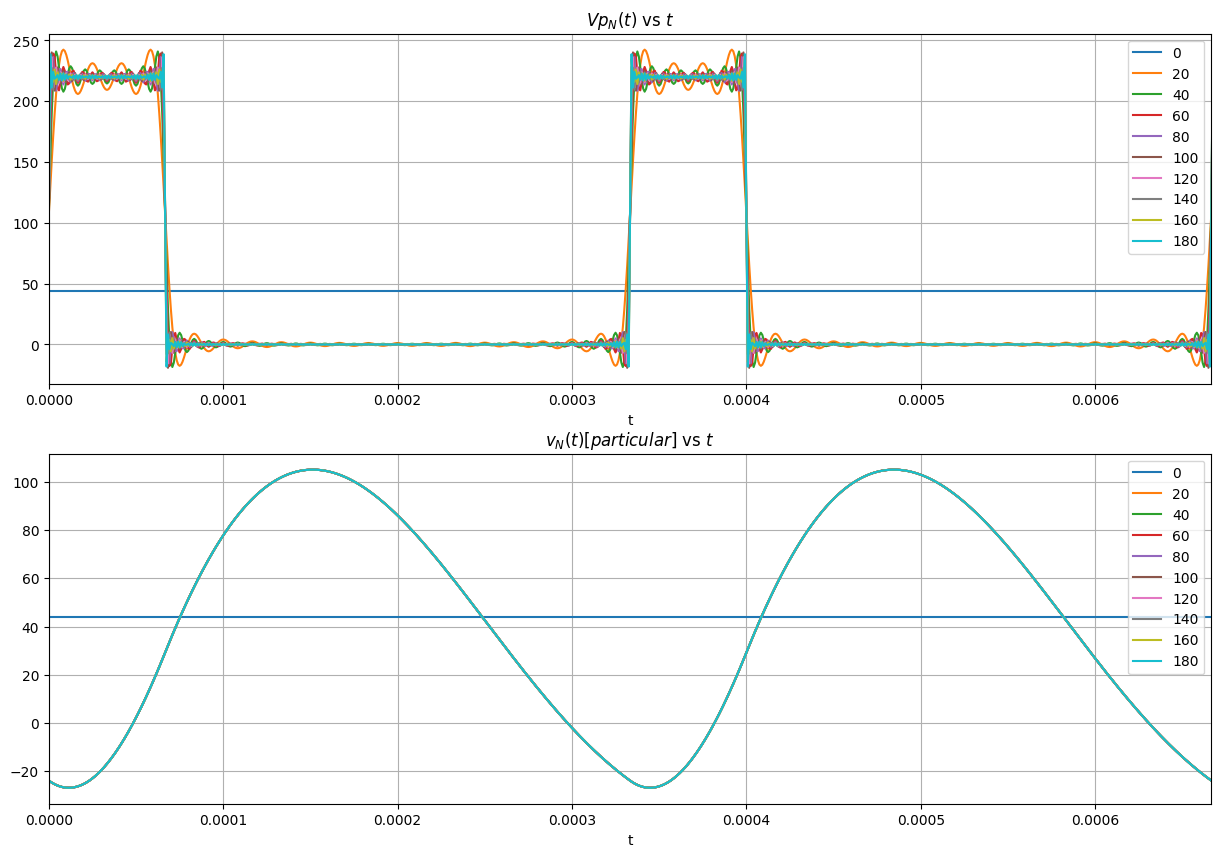

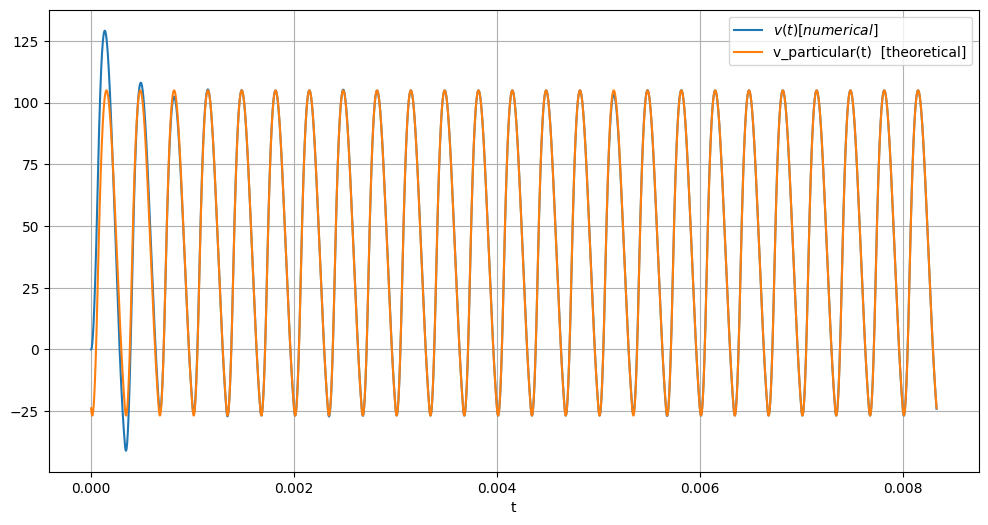

Tsw = 0.000125, D = 0.8, L = 2.9999999999999997e-05 H, R = 0.6 Ohm, C = 5.9999999999999995e-05 F


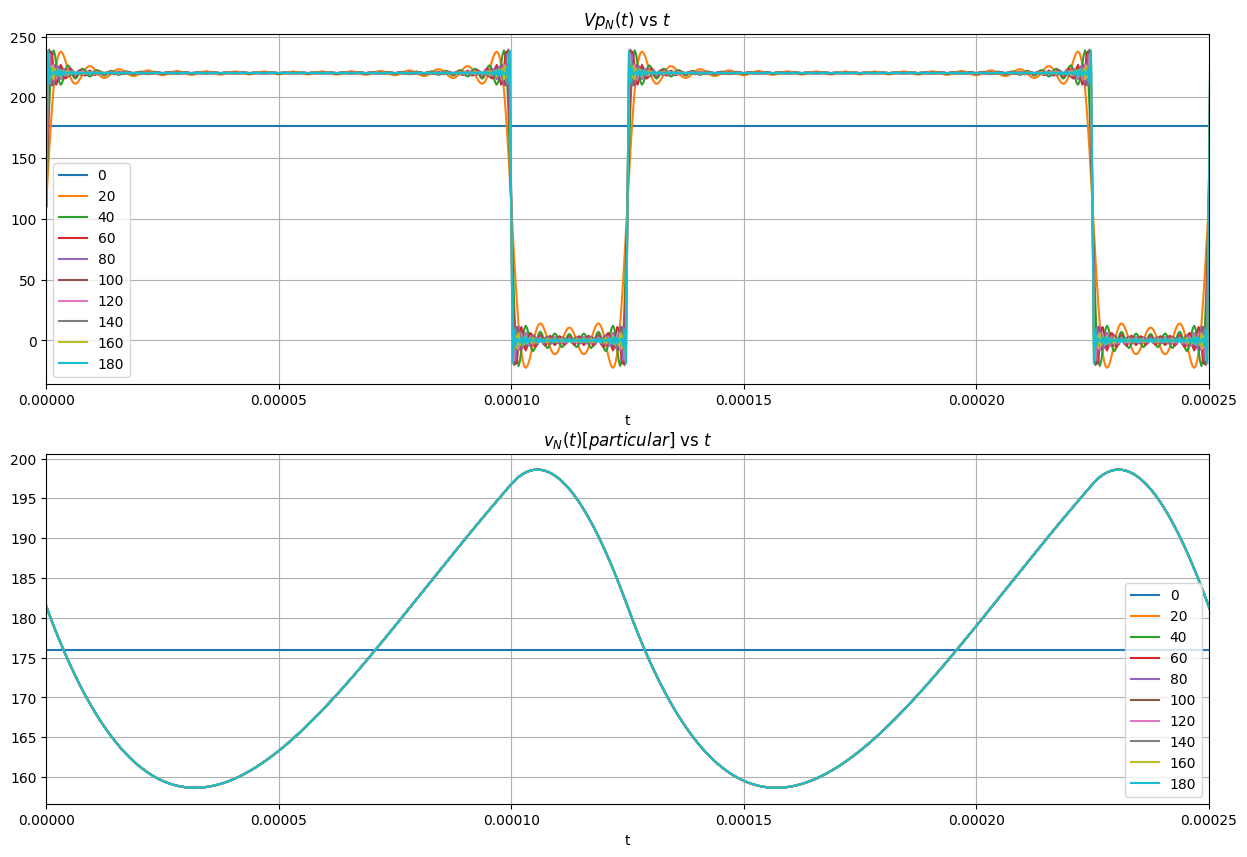

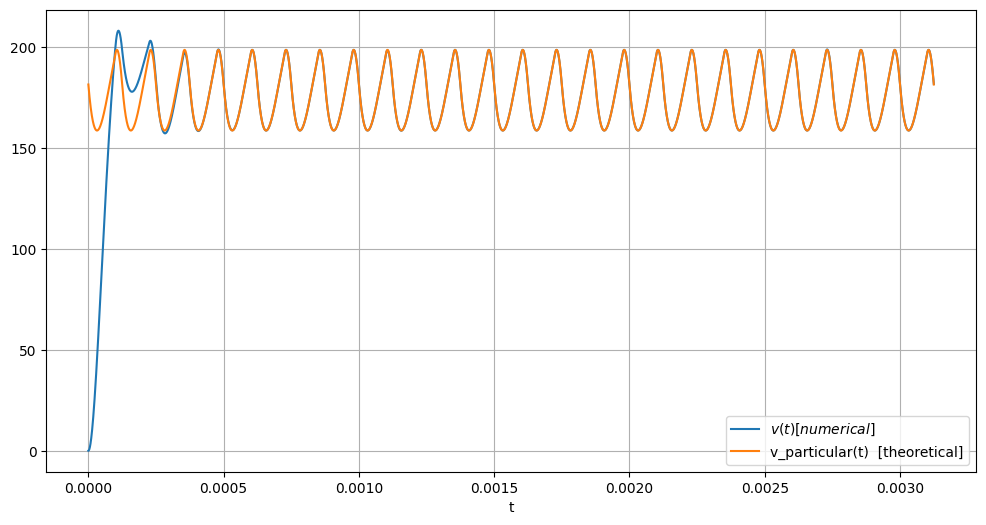

Tsw = 0.00016666666666666666, D = 0.8, L = 1.9999999999999998e-05 H, R = 0.1 Ohm, C = 4.9999999999999996e-05 F


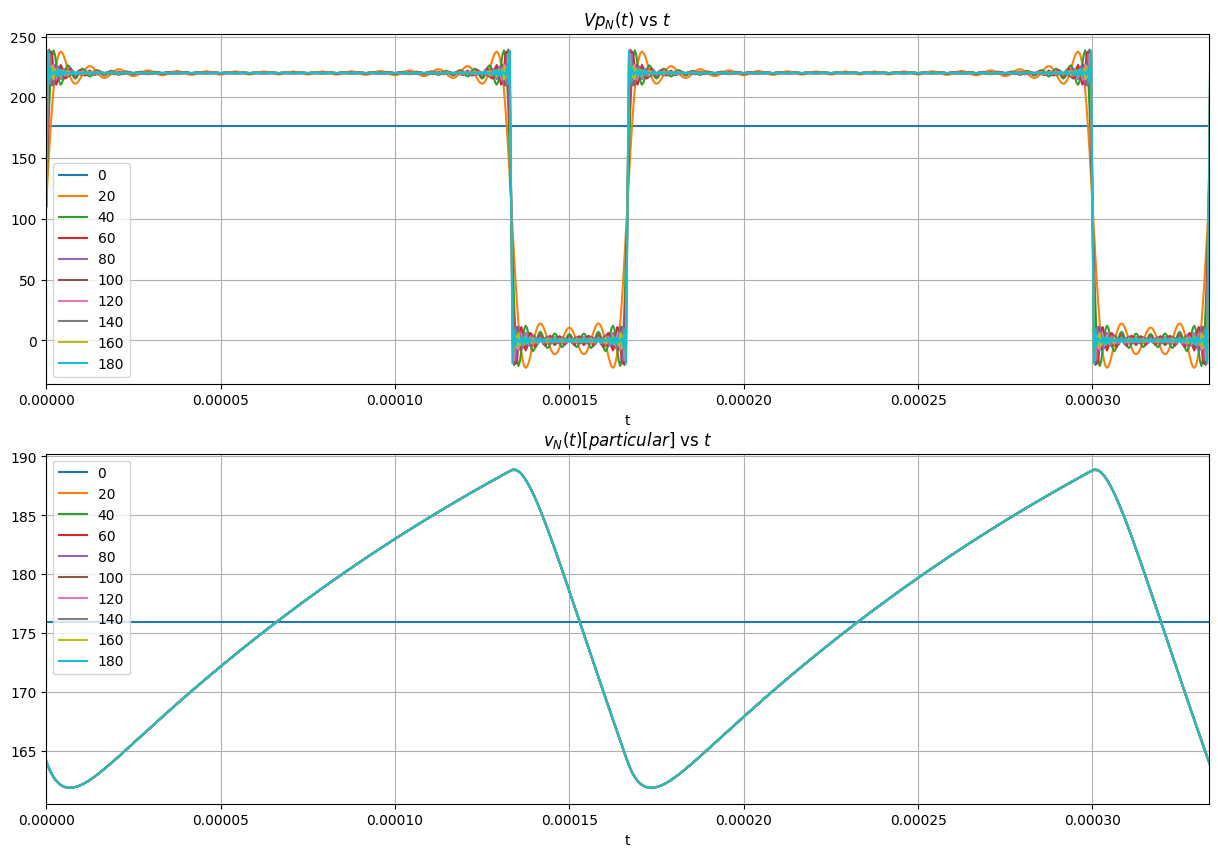

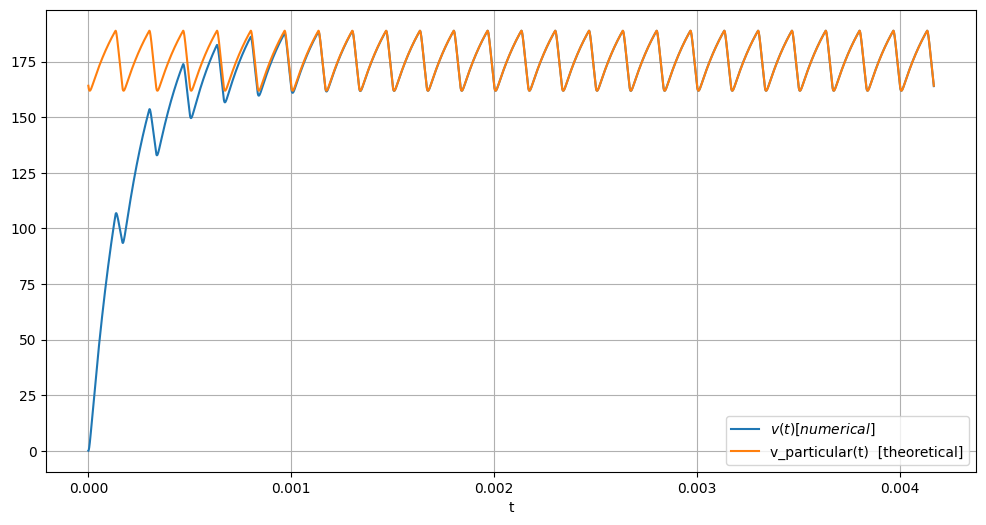

Tsw = 0.00016666666666666666, D = 0.4, L = 8.999999999999999e-05 H, R = 4.6 Ohm, C = 9.999999999999999e-06 F


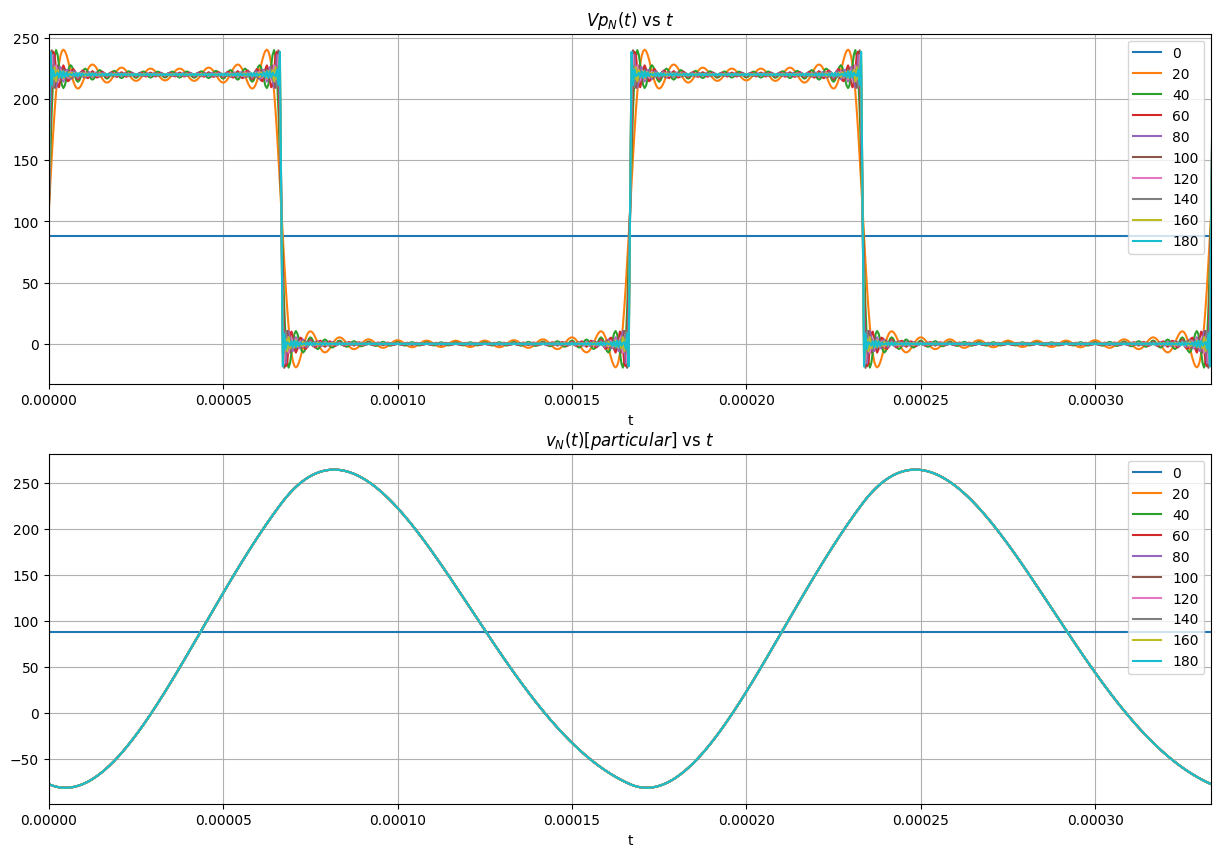

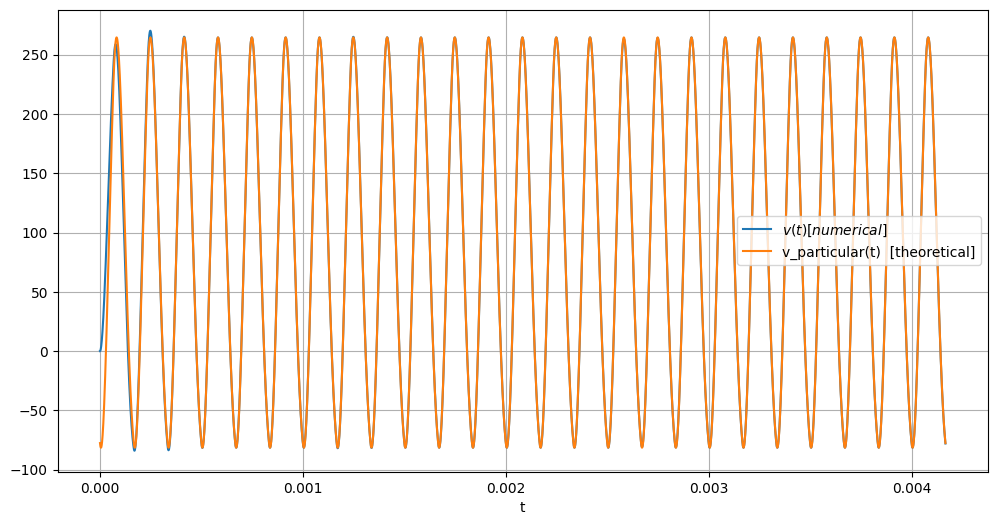

In [39]:
np.random.seed(42)
testCircuits = 5
while(testCircuits):
    testCircuits -= 1
    D = np.random.choice(np.arange(0.1,0.9,0.1))
    Tsw = 10**(-2)/np.random.choice(np.arange(10,100,10))
    Vdc = 220 

    L = np.random.choice(np.arange(10,100,10)) * (10**-6)
    C = np.random.choice(np.arange(10,100,10)) * (10**-6)
    R = np.random.choice(np.arange(0.1,10,0.5))

    print(f"Tsw = {Tsw}, D = {D}, L = {L} H, R = {R} Ohm, C = {C} F")
    a = L*C
    b = L/R
    c = 1

    def g(x):
        x /= Tsw
        x = x - np.floor(x)
        if x < D:
            return Vdc
        return 0

    x0, x1 = 0, 25*Tsw
    num_points = 10000
    t_array = np.linspace(x0, x1, num_points + 1)

    # Fourier coefficients
    def A(n):
        return Vdc * (1 / (n * np.pi)) * np.sin(2 * np.pi * n * D)

    def B(n):
        return Vdc * (2 / (n * np.pi)) * np.sin(np.pi * n * D) ** 2

    # Particular solution coefficients
    w = 2 * np.pi / Tsw
    def alpha(n, b, c):
        Deno = (c - a * (w*n) ** 2) ** 2 + (b * (w*n)) ** 2
        Num = B(n) * (c - a * (w*n) ** 2) + A(n) * b * (w*n)
        return Num / Deno

    def beta(n, b, c):
        Deno = (c - a * (w*n) ** 2) ** 2 + (b * (w*n)) ** 2
        Num = A(n) * (c - a * (w*n) ** 2) - B(n) * b * (w*n)
        return Num / Deno

    fig, ax = plt.subplots(2, figsize=(15, 10))
    ax[0].set_xlabel("t")
    ax[1].set_xlabel("t")

    for _ in range(0, 200, 20):
        vpN = np.full(t_array.shape, D*Vdc)
        for n in range(1, _ + 1):
            vpN = vpN + A(n) * np.cos(w * n * t_array) + B(n) * np.sin(w * n * t_array)

        ax[0].plot(t_array, vpN, label=f'{_}')

        vNp = np.full(t_array.shape, D*Vdc)  # particular solution
        for n in range(1, _ + 1):
            vNp = vNp + alpha(n, b, c) * np.sin(w * n * t_array) + beta(n, b, c) * np.cos(w * n * t_array)

        ax[1].plot(t_array, vNp, label=f'{_}')

    ax[0].grid()
    ax[0].legend()
    ax[0].set_title("$Vp_N(t)$ vs $t$")
    ax[0].set_xlim([0, 2*Tsw])

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title("$v_N(t) [particular]$ vs $t$")
    ax[1].set_xlim([0, 2*Tsw])
    plt.show()

    # Numerical solution
    ###########
    def function_1(x, Y):
        return  Y[1]
    def function_2(x, Y):
        return -b/a * Y[1] - c/a * Y[0] + g(x)/a

    def f(x, Y):
        return np.array([function_1(x, Y), function_2(x, Y)])

    N = 2
    Y0 = np.array([0, 0])
    y_array = equation_solver(x0, x1, num_points, Y0, N)
    ###########

    plt.figure(figsize=(12, 6))
    plt.plot(t_array, y_array[0], label=f'$v(t) [numerical]$')
    plt.plot(t_array, vNp, label=r'v_particular(t)  [theoretical]')
    plt.xlabel('t')
    plt.legend()
    plt.grid(True)
    plt.show()

In [40]:
m = 3/2
f_m = 12
f_c = int(m*f_m)
g = math.gcd(f_m,f_c)
T = np.linspace(-1/g,1/g,1000)

v = 0.8 * np.sin(2*np.pi*f_m*T)
w = carrier(T,f_m,f_c)
plt.figure(figsize=(12, 6))
plt.plot(T,w, color = 'r', label = r'$V_c(t)$ carrier')
plt.plot(T,v, color = 'b', label = r'$V_m(t)$ modulation')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

z = np.sign(v-w)
z = np.array(z)
plt.figure(figsize=(12, 6))
plt.plot(T,z,label = 'V(t)')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()
# find gcd of f_m and f_C

# find the DFT of z
dft_result = np.fft.fft(z)
freqs = np.fft.fftfreq(len(z), d=T[1] - T[0])
plt.figure(figsize=(24, 6))
plt.title("DFT F(real) vs s")
plt.stem(freqs/g, dft_result.real)
plt.xticks(freqs/g)
plt.xlabel(f'{g}Hz')
plt.xlim([0,10])
plt.grid()
plt.show()

plt.figure(figsize=(24, 6))
plt.title("DFT F(imaginary) vs s")
plt.stem(freqs/g, dft_result.imag)
plt.xticks(freqs/g)
plt.xlabel(f'{g}Hz')
plt.xlim([0,10])
plt.grid()
plt.show()

NameError: name 'carrier' is not defined

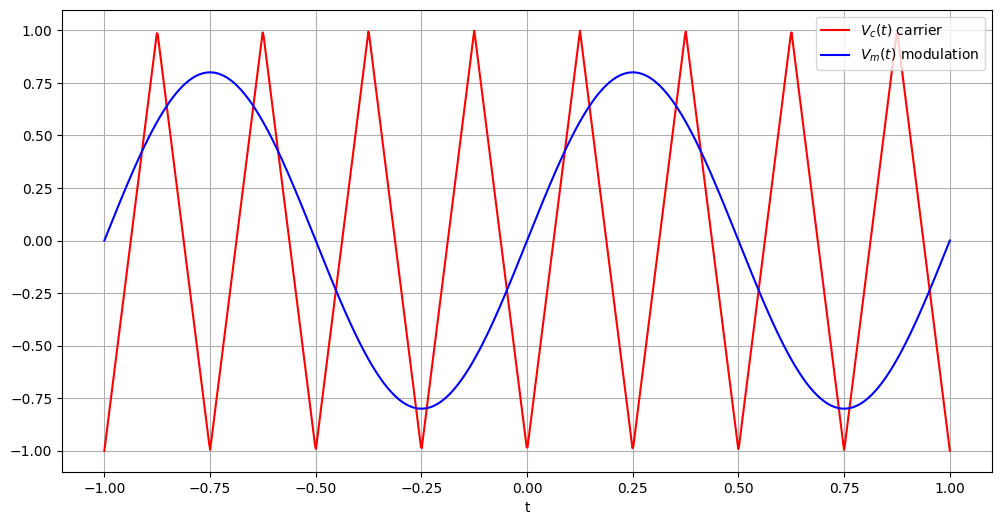

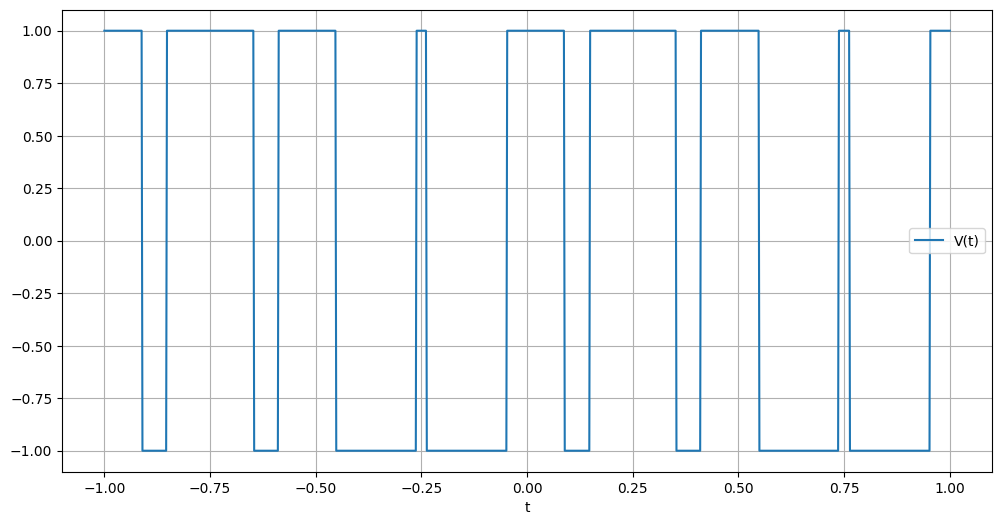

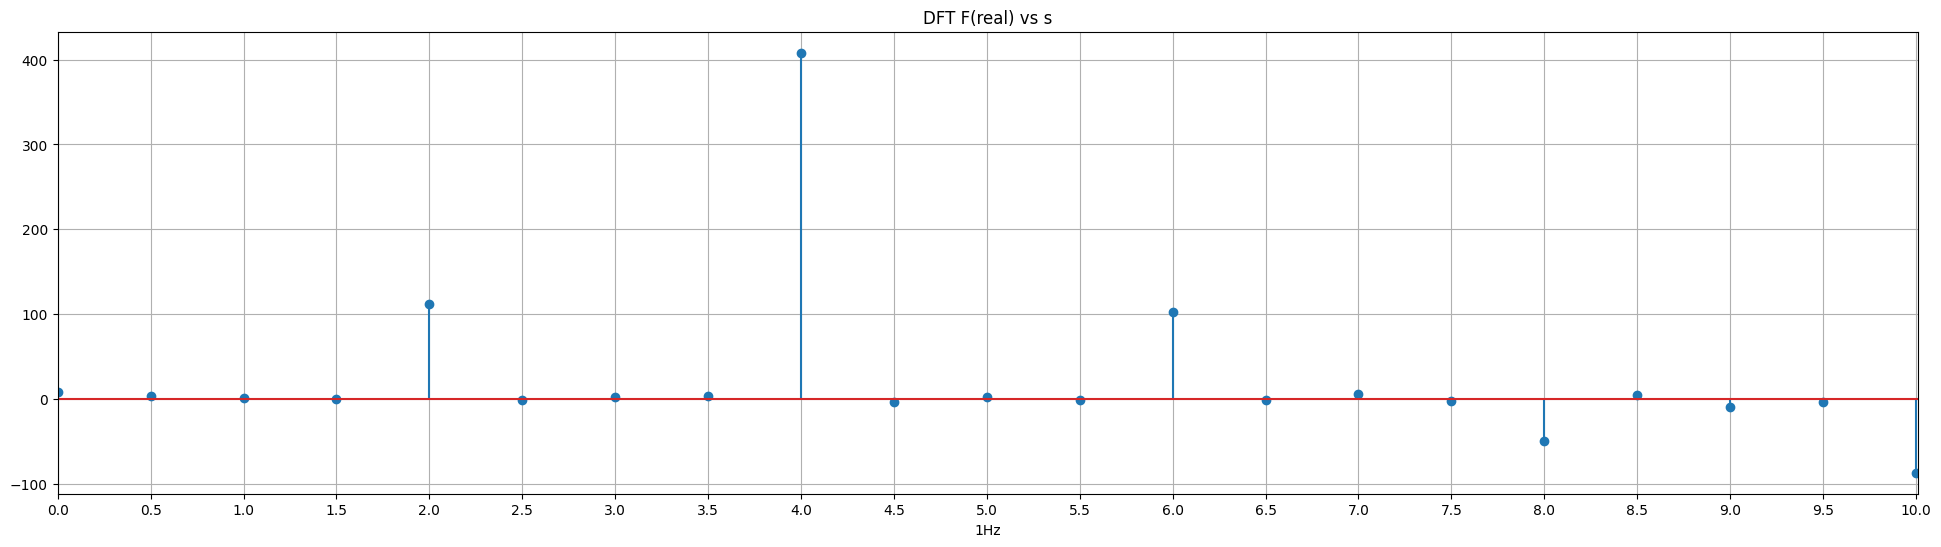

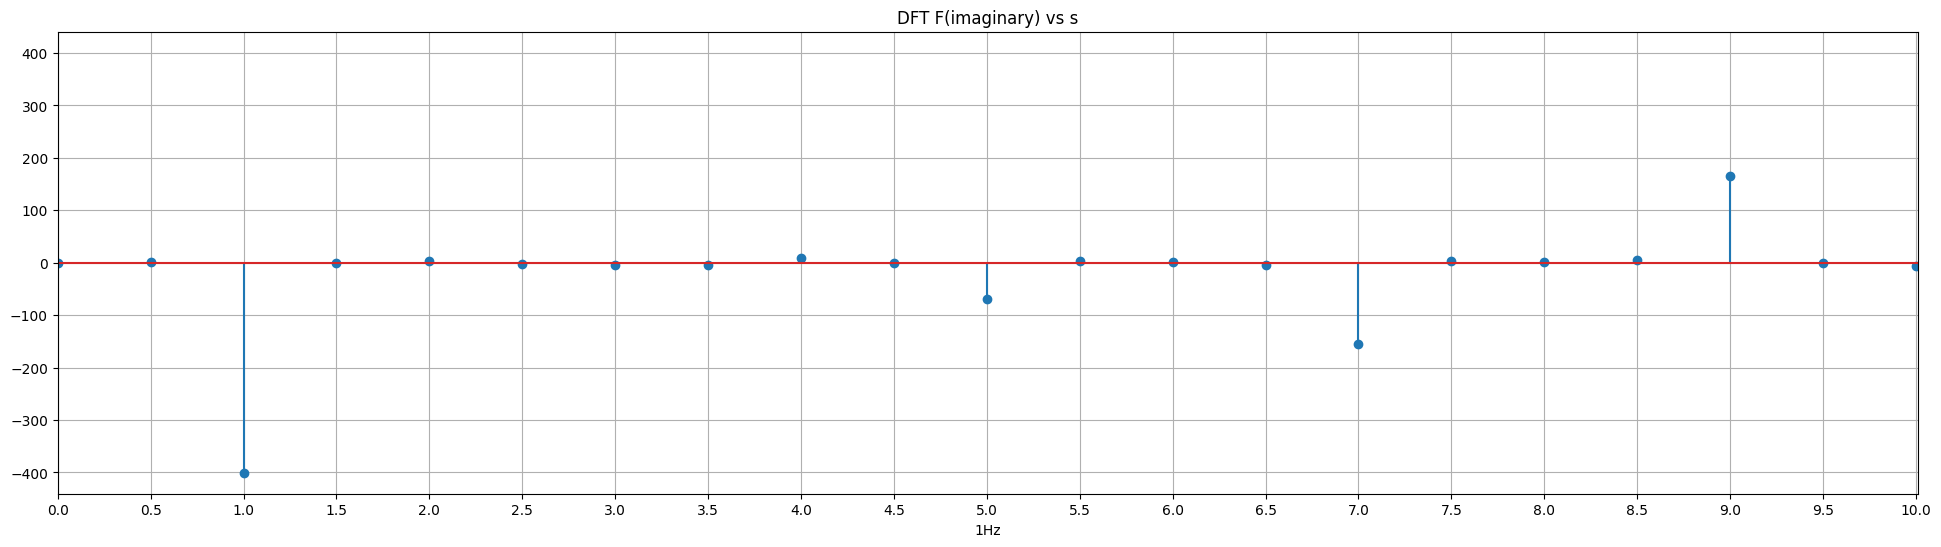

In [ ]:
m = 4
f_m = 1
f_c = int(m*f_m)
g = math.gcd(f_m,f_c)
T = np.linspace(-1/g,1/g,1000)

v = 0.8 * np.sin(2*np.pi*f_m*T)
w = carrier(T,f_m,f_c)
plt.figure(figsize=(12, 6))
plt.plot(T,w, color = 'r', label = r'$V_c(t)$ carrier')
plt.plot(T,v, color = 'b', label = r'$V_m(t)$ modulation')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

z = np.sign(v-w)
z = np.array(z)
plt.figure(figsize=(12, 6))
plt.plot(T,z,label = 'V(t)')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()
# find gcd of f_m and f_C

# find the DFT of z
dft_result = np.fft.fft(z)
freqs = np.fft.fftfreq(len(z), d=T[1] - T[0])
plt.figure(figsize=(24, 6))
plt.title("DFT F(real) vs s")
plt.stem(freqs/g, dft_result.real)
plt.xticks(freqs/g)
plt.xlabel(f'{g}Hz')
plt.xlim([0,10])
plt.grid()
plt.show()

plt.figure(figsize=(24, 6))
plt.title("DFT F(imaginary) vs s")
plt.stem(freqs/g, dft_result.imag)
plt.xticks(freqs/g)
plt.xlabel(f'{g}Hz')
plt.xlim([0,10])
plt.grid()
plt.show()

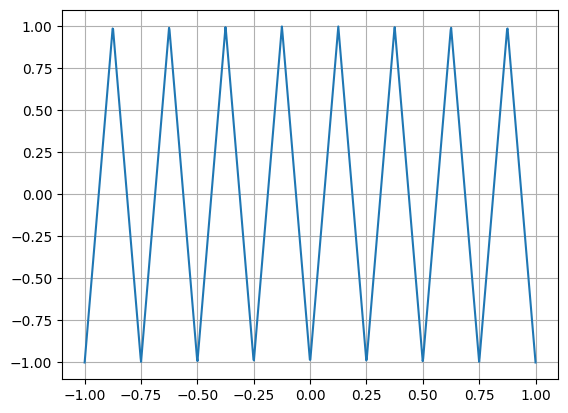

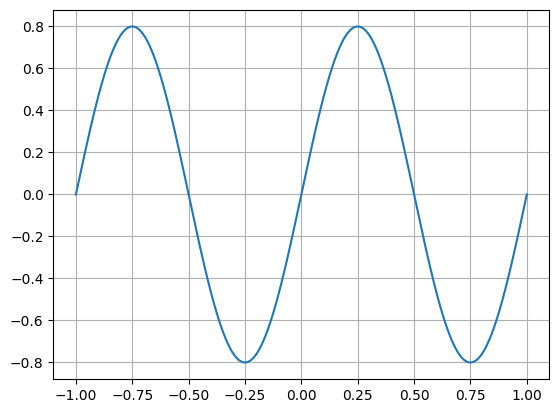

In [ ]:
plt.plot(T, w)
plt.grid()
plt.show()

plt.plot(T, v)
plt.grid()
plt.show()

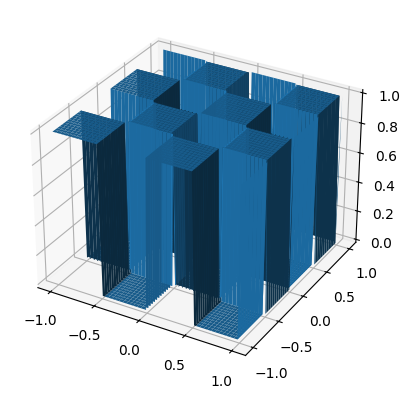

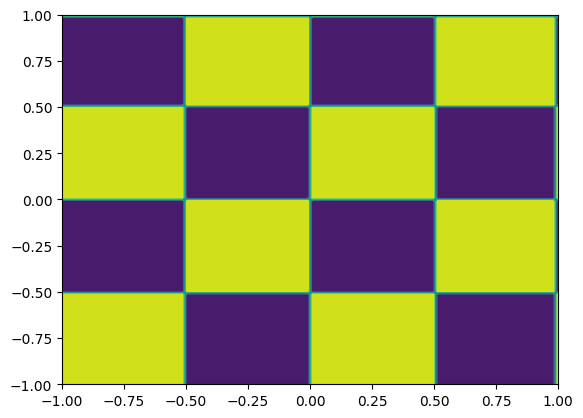

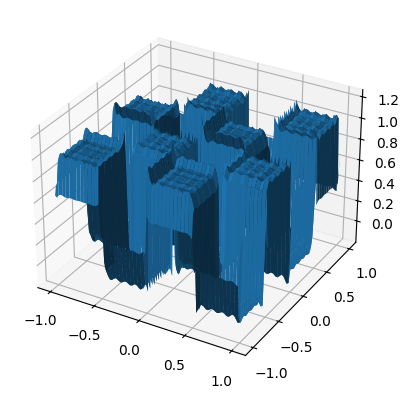

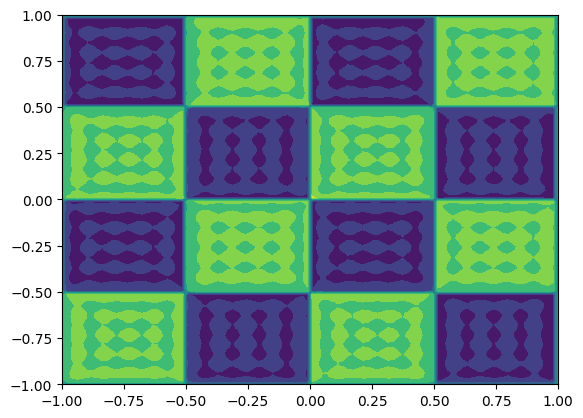

In [37]:
import numpy as np
import matplotlib.pyplot as plt
# create a mesh grid of x and y
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)

X,Y = np.meshgrid(x,y)
# define a function (checkerboard) f(x,y) = 1 if [2*x] % 2 = [2*y] % 2 else 0
def par(x):
    return np.floor(x).astype(int) % 2
fxy = par(2*X) == par(2*Y)
fxy = fxy.astype(int)
fxy = fxy.astype(float)
# scatter the 3-D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,fxy)
plt.show()
# plot level curve of f(x,y) = 1
plt.contourf(X,Y,fxy)
plt.show()

# Integrate limit x = [0,1], y = [0,1] f(x,y) cos(2*pi*m*x) sin(2*pi*n*y) dx dy
x_lim = np.linspace(0,1,500)
y_lim = np.linspace(0,1,500)
X_lim,Y_lim = np.meshgrid(x_lim,y_lim)
delta_x = x_lim[1] - x_lim[0]
delta_y = y_lim[1] - y_lim[0]
f_xy = par(2*X_lim) == par(2*Y_lim)
f_xy = f_xy.astype(int)
f_xy = f_xy.astype(float)

z = np.zeros_like(fxy)

N = 40
# Adding zero order term
z += np.sum(f_xy*delta_x*delta_y)

# Adding first order terms
for m in range(1,N+1):
    z += 2*np.sum(f_xy * np.cos(2*np.pi*m*X_lim) * delta_x * delta_y) * np.cos(2*np.pi*m*X)
    z += 2*np.sum(f_xy * np.sin(2*np.pi*m*X_lim) * delta_x * delta_y) * np.sin(2*np.pi*m*Y)

# Adding second order terms    
for m in range(1,N+1):
    for n in range(1,N+1):
        z += 4*np.sum(f_xy * np.cos(2*np.pi*m*X_lim) * np.sin(2*np.pi*n*Y_lim) * delta_x * delta_y) * np.cos(2*np.pi*m*X) * np.sin(2*np.pi*n*Y)
        z += 4*np.sum(f_xy * np.cos(2*np.pi*m*X_lim) * np.cos(2*np.pi*n*Y_lim) * delta_x * delta_y) * np.cos(2*np.pi*m*X) * np.cos(2*np.pi*n*Y)
        z += 4*np.sum(f_xy * np.sin(2*np.pi*m*X_lim) * np.sin(2*np.pi*n*Y_lim) * delta_x * delta_y) * np.sin(2*np.pi*m*X) * np.sin(2*np.pi*n*Y)
        z += 4*np.sum(f_xy * np.sin(2*np.pi*m*X_lim) * np.cos(2*np.pi*n*Y_lim) * delta_x * delta_y) * np.sin(2*np.pi*m*X) * np.cos(2*np.pi*n*Y)
        
# plot 3-D of z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,z)
plt.show()
# plot the contour of z
plt.contourf(X,Y,z)
plt.show()